# Libraries

In [116]:
import matplotlib.pyplot as plt
import numpy as np
import xport
import pandas as pd
from pandas import DataFrame
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
#from fancyimpute import KNN 
from sklearn.tree import export_graphviz
import sklearn
import missingno as msno
%matplotlib inline

# Converting data from xpt to csv

In [95]:
data = []
with open('DPQ_I.XPT', 'rb') as f:
    for row in xport.Reader(f):
        lst = list(row)
        data.append(lst)
data = pd.DataFrame(data)
export_csv = data.to_csv(r'C:\Users\Yiyic\Projects\capstone\Depression.csv', header=False) 
dep1516=pd.read_csv('Depression.csv',names=['Respondnum','littleInterest','Down','SleepTime','Tired','Appetite','BadForSelf','Concentrate','Slow','Suicide','Difficulty'])

data2=[]
with open('DPQ_H.XPT', 'rb') as f:
    for row in xport.Reader(f):
        lst2 = list(row)
        data2.append(lst2)
data2=pd.DataFrame(data2)
export_csv = data2.to_csv(r'C:\Users\Yiyic\Projects\capstone\Depression2.csv', header=False) 
dep1314=pd.read_csv('Depression2.csv',names=['Respondnum','littleInterest','Down','SleepTime','Tired','Appetite','BadForSelf','Concentrate','Slow','Suicide','Difficulty'])

data3=[]
with open('DPQ_G.XPT', 'rb') as f:
    for row in xport.Reader(f):
        lst3 = list(row)
        data3.append(lst3)
data3=pd.DataFrame(data3)
export_csv = data3.to_csv(r'C:\Users\Yiyic\Projects\capstone\Depression3.csv', header=False) 
dep1112=pd.read_csv('Depression3.csv',names=['Respondnum','littleInterest','Down','SleepTime','Tired','Appetite','BadForSelf','Concentrate','Slow','Suicide','Difficulty'])

In [96]:
final_df = pd.concat([dep1516, dep1314,dep1112], axis =0)

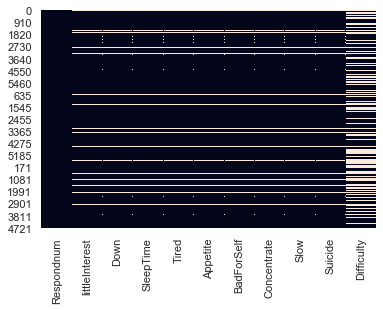

In [97]:
sns.heatmap(final_df.isnull(),cbar=False)

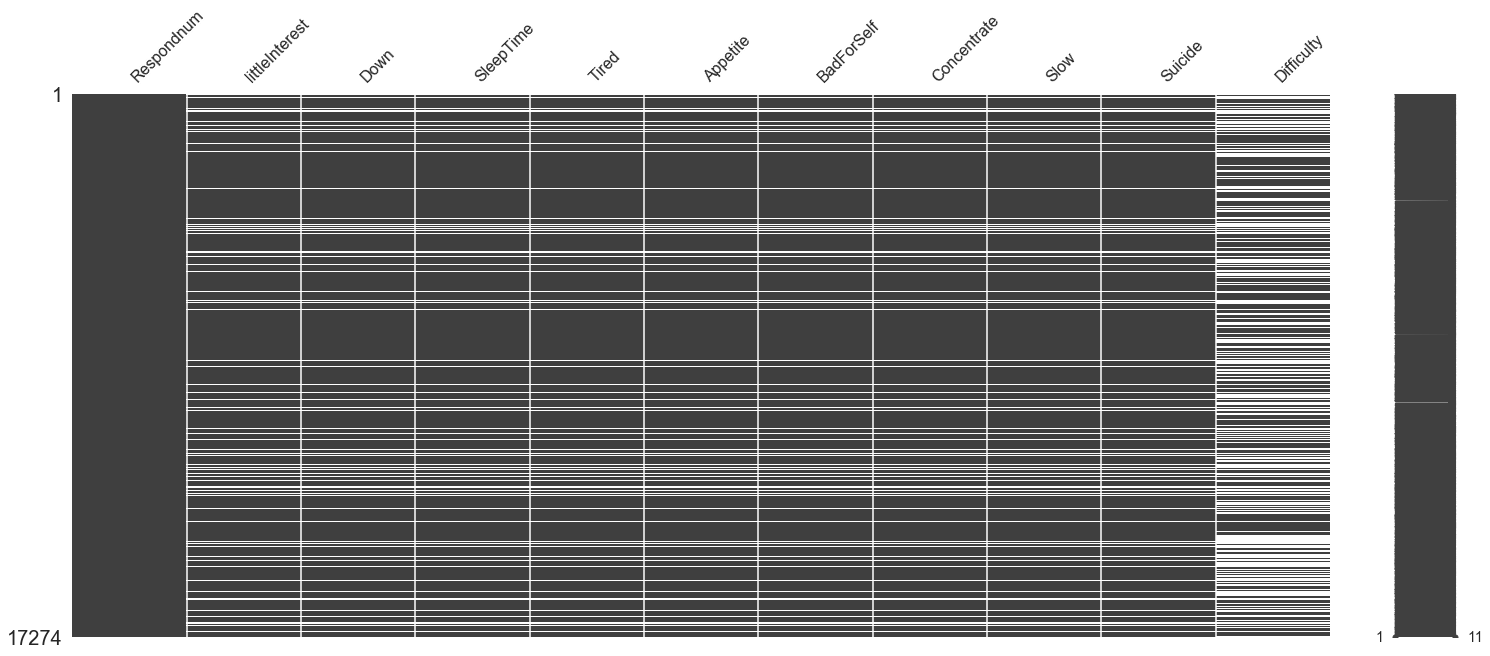

In [98]:
msno.matrix(final_df)

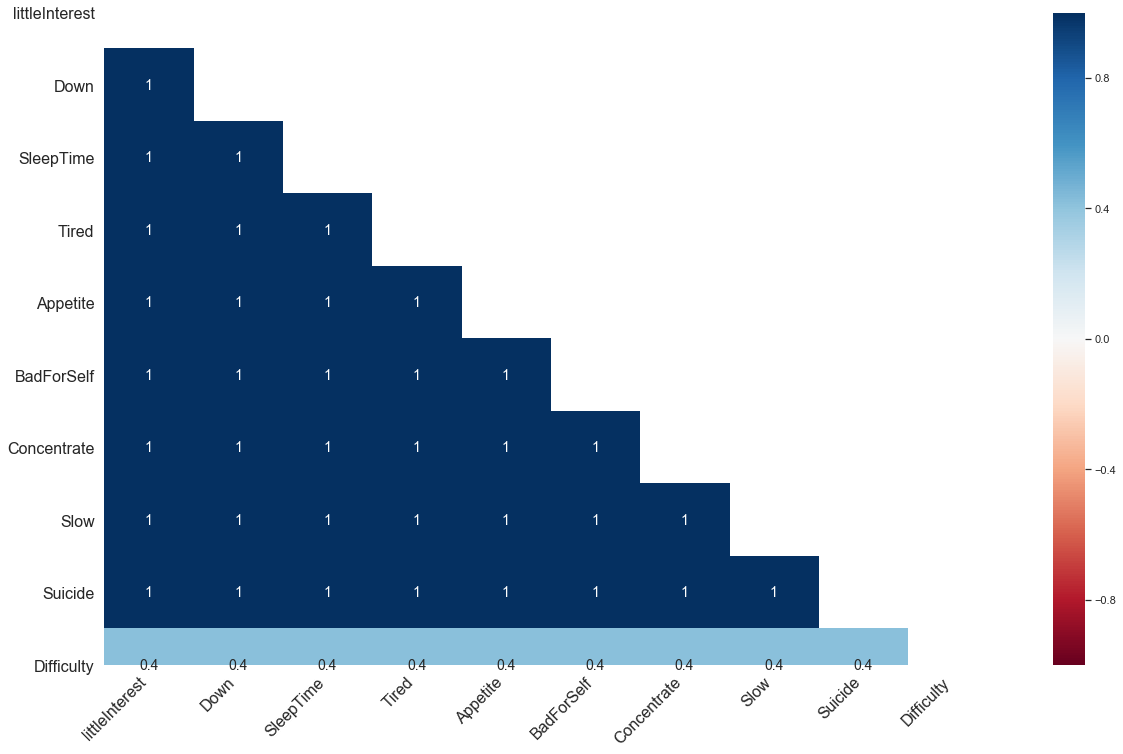

In [99]:
# missingno has heatmap to visualize the correlation matrix about the locations of missing values in columns.
msno.heatmap(final_df)

In [100]:
final_df.head()

,Respondnum,littleInterest,Down,SleepTime,Tired,Appetite,BadForSelf,Concentrate,Slow,Suicide,Difficulty
0,83732.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,83733.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,83734.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,83735.0,1.0,1.0,2.0,2.0,1.0,3.0,2.0,0.0,1.0,0.0
4,83736.0,1.0,1.0,1.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0


# Get Dummy variables

In [103]:
final_df.littleInterest.value_counts()

0.0    11507
1.0     2533
2.0      762
3.0      682
9.0       19
7.0       10
Name: littleInterest, dtype: int64

In [104]:
pd.get_dummies(final_df,columns=['littleInterest','Down','Tired','Appetite','BadForSelf','Concentrate','Slow','Suicide','Difficulty'],drop_first=True)


,Respondnum,SleepTime,littleInterest_1.0,littleInterest_2.0,littleInterest_3.0,littleInterest_7.0,littleInterest_9.0,Down_1.0,Down_2.0,Down_3.0,...,Suicide_1.0,Suicide_2.0,Suicide_3.0,Suicide_7.0,Suicide_9.0,Difficulty_1.0,Difficulty_2.0,Difficulty_3.0,Difficulty_7.0,Difficulty_9.0
0,83732.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,83733.0,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,83734.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,83735.0,2.0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,83736.0,1.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,71909.0,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5611,71911.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5612,71912.0,0.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5613,71913.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Visualize missing data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17274 entries, 0 to 5614
Data columns (total 11 columns):
Respondnum        17274 non-null float64
littleInterest    15513 non-null float64
Down              15509 non-null float64
SleepTime         15507 non-null float64
Tired             15504 non-null float64
Appetite          15504 non-null float64
BadForSelf        15502 non-null float64
Concentrate       15501 non-null float64
Slow              15500 non-null float64
Suicide           15498 non-null float64
Difficulty        10452 non-null float64
dtypes: float64(11)
memory usage: 1.6 MB
['Respondnum' 'littleInterest' 'Down' 'SleepTime' 'Tired' 'Appetite'
 'BadForSelf' 'Concentrate' 'Slow' 'Suicide' 'Difficulty']


{'Respondnum': 0.0,
 'littleInterest': 0.10194511983327545,
 'Down': 0.10217668171818918,
 'SleepTime': 0.10229246266064605,
 'Tired': 0.10246613407433136,
 'Appetite': 0.10246613407433136,
 'BadForSelf': 0.10258191501678823,
 'Concentrate': 0.10263980548801667,
 'Slow': 0.1026976959592451,
 'Suicide': 0.10281347690170198,
 'Difficulty': 0.394928794720389}

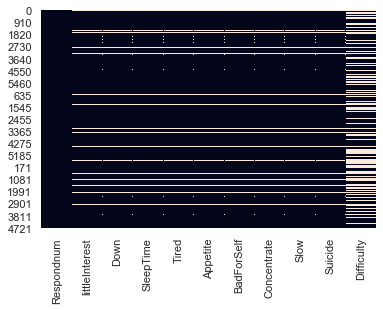

In [106]:
final_df.info()
sns.heatmap(final_df.isnull(), cbar=False)
col_name = list(final_df.columns.values)
col_name = np.array(col_name)
print(col_name)
NULL_values = np.array(final_df.isna().sum())
NULL_ratio = NULL_values/len(final_df)
dict(zip(col_name, NULL_ratio))

# Imputation of missing data

In [ ]:
final_df['']

In [18]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split()

ValueError: At least one array required as input